In [187]:
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk

In [188]:
def integrate(f, a, b, method, N):
	h = (b - a) / N
	left = a
	right = a + h
	I = 0
	for i in range(N):
		I += method(f, left, right)
		left += h
		right += h
	return I

# Trapezoidal method
$\frac{f(a) + f(b)}{2}\cdot(b-a)$

In [189]:
trapezoidal_method = lambda f, a, b: (f(a) + f(b)) / 2 * (b - a)

# Simpson method
$\left( f(a) + 4\cdot f(\frac{a+b}{2}) + f(b) \right) \cdot \frac{(b-a)}{6}$

In [190]:
simpson_method = lambda f, a, b: (f(a) + 4 * f((a + b) / 2) + f(b)) * (b - a) / 6

# Bessel function: $J_{m}(x)=\frac{1}{\pi}\int_{0}^{\pi}\cos(mt - x\cdot\sin(t))dt$

In [191]:
def J(x, m, rule, N=2**8):
	result = integrate(lambda t: np.cos(m * t - x * np.sin(t)), 0, np.pi, rule, N)
	return (1 / np.pi) * result

def dJ(x, m, rule, delta=1e-5):
	return (J(x + delta, m, rule) - J(x - delta, m, rule)) / (2 * delta)

# $J^{'}_{0}(x)+J_{1}(x) = 0$ $x\in [0, 2\pi]$

In [192]:
precision = 1e-10

a = 0
b = 2 * np.pi
domain = np.linspace(a, b, 100)

expression = np.vectorize(lambda x, method, N=2**8: dJ(x, 0, method) + J(x, 1, method, N))
simpson_result = expression(domain, simpson_method)
trapezoidal_result = expression(domain, trapezoidal_method, N=2**14)

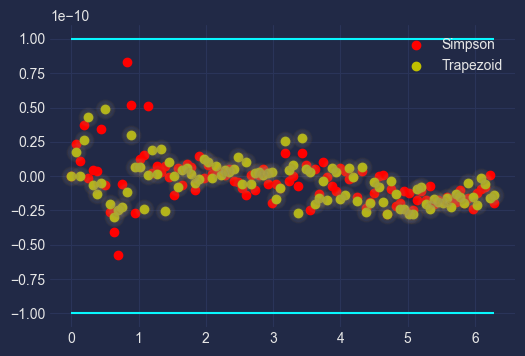

In [193]:
plt.rcParams['figure.dpi'] = 100
plt.style.use('cyberpunk')
plt.scatter(domain, simpson_result, label="Simpson", c='r')
plt.scatter(domain, trapezoidal_result, label="Trapezoid", c='y')
mplcyberpunk.make_scatter_glow()
plt.hlines(precision, xmin=domain[0], xmax=domain[-1])
plt.hlines(-precision, xmin=domain[0], xmax=domain[-1])
plt.legend()
plt.show()

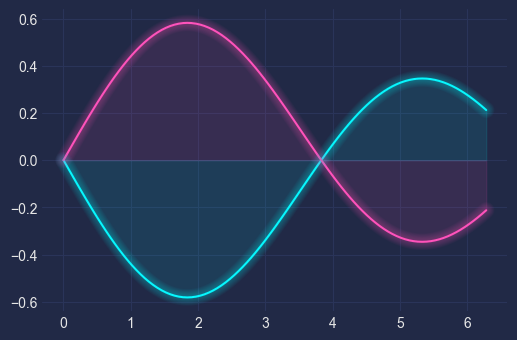

In [194]:
a = 0
b = 2 * np.pi
domain = np.linspace(a, b, 100)

derivative = np.vectorize(lambda x, method: dJ(x, 0, method))
bessel = np.vectorize(lambda x, method: J(x, 1, method))
plt.plot(domain, derivative(domain, simpson_method))
plt.plot(domain, bessel(domain, simpson_method))
mplcyberpunk.add_glow_effects()
plt.show()